# 

# Univariate maps and gradients

* TODO: Get retrieval > Math and Encoding > math 
* plot math on it's own 
* vectors?

In [1]:
%matplotlib inline
import numpy as np
import nibabel as nib
import pandas as pd
import os, glob, re
from os.path import join
from pathlib import Path
import nilearn
import argparse
from nilearn import image, plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import threshold_stats_img
import matplotlib.pyplot as plt
from scipy.stats import norm
from nilearn.glm import cluster_level_inference
from nilearn import plotting
from nilearn.glm.second_level import SecondLevelModel
from neuromaps.transforms import mni152_to_fslr, mni152_to_fsaverage, mni152_to_civet
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from neuromaps.datasets import fetch_atlas, fetch_fslr, fetch_fsaverage
from surfplot import Plot
from surfplot.utils import threshold

from neuromaps.datasets import fetch_fslr



## functions

In [32]:
def task_surf(task_lh, task_rh, cmap_key, cmap_range, cbar_label):
    from neuromaps.datasets import fetch_fslr
    from surfplot import Plot
    # get surfaces + sulc maps
    surfaces = fetch_fslr()
    lh, rh = surfaces['inflated']
    sulc_lh, sulc_rh = surfaces['sulc']

    p = Plot(lh, rh)
    p.add_layer({'left': lh, 'right': rh}, cmap='binary_r', cbar=False)

    p.add_layer({'left': task_lh, 'right': task_rh}, cmap=cmap_key,
                color_range=cmap_range, cbar_label=cbar_label)

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
    fig = p.build(cbar_kws=cbar_kws)
    # add units to colorbar
    fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
    fig.show()

### Zmap parameters

In [556]:
second_dir = '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/2ndlevel'

In [557]:
memorynii = image.load_img(join(second_dir, 'second-level_task-memory_con-01_desc-encodeGTretrieval_stat-Zmap.nii.gz'))
encodenii = image.load_img(join(second_dir, 'second-level_task-memory_con-02_desc-encodeGTmath_stat-Zmap.nii.gz'))
retrievenii = image.load_img(join(second_dir, 'second-level_task-memory_con-03_desc-retrievalGTmath_stat-Zmap.nii.gz'))
posnernii = image.load_img(join(second_dir, 'second-level_task-posner_con-01_desc-invalidGTvalid_stat-Zmap.nii.gz'))
saxenii   = image.load_img(join(second_dir, 'second-level_task-tomsaxe_con-01_desc-beliefGTphoto_stat-Zmap.nii.gz'))
spuntnii  = image.load_img(join(second_dir, 'second-level_task-tomspunt_con-01_desc-whyGThow_stat-Zmap.nii.gz'))
retreivalGTencode = image.math_img('-img', img=memorynii)

# 01: plot univariate maps

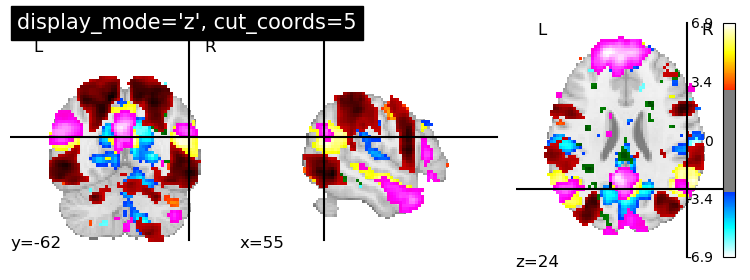

In [172]:
display = plotting.plot_stat_map(memorynii,
                                # display_mode='mosaic',
                                 cut_coords=(55, -62, 24),
                                 threshold=3,
                                 title="display_mode='z', cut_coords=5")
                                #  cmap=plotting.cm.black_yellow)
display.add_overlay(posnernii, cmap=plotting.cm.black_blue, threshold=3)
display.add_overlay(saxenii, cmap=plotting.cm.black_green, threshold=3)
display.add_overlay(spuntnii, cmap=plotting.cm.black_pink, threshold=3)


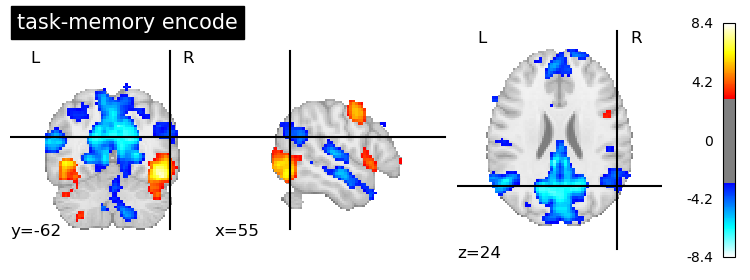

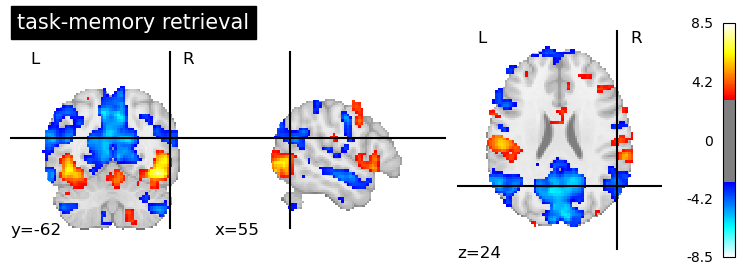

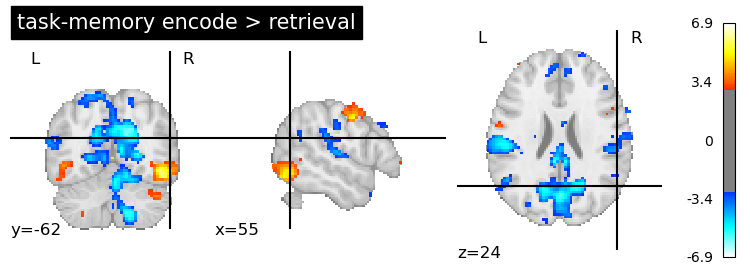

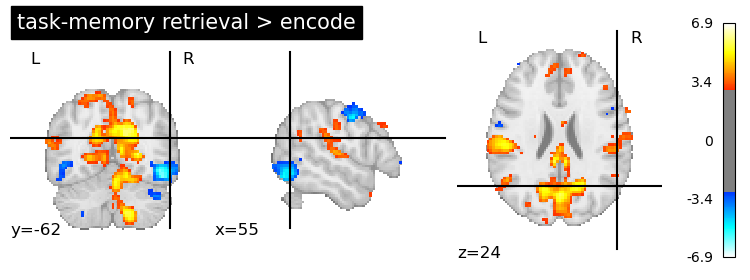

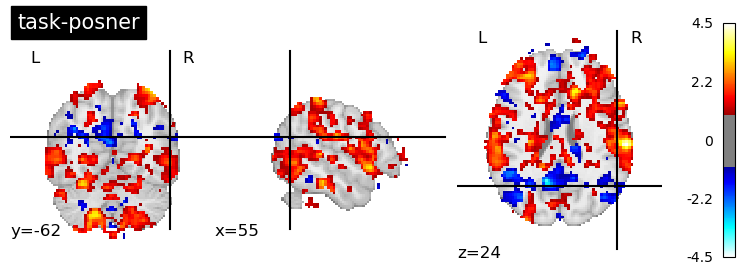

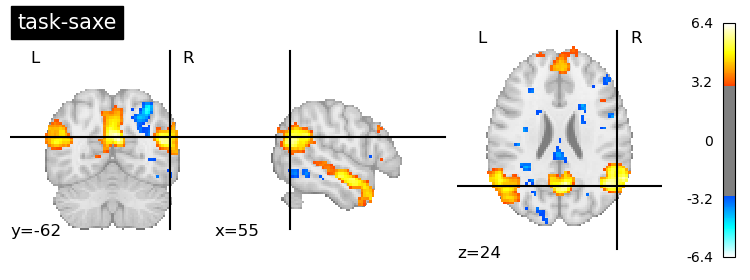

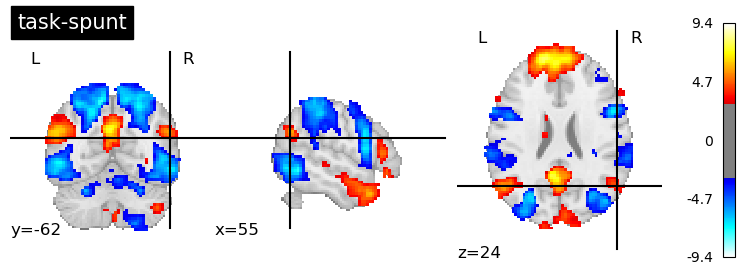

In [259]:
plotting.plot_stat_map(encodenii, cut_coords=(55, -62, 24), threshold=3, title="task-memory encode")
plotting.plot_stat_map(retrievenii, cut_coords=(55, -62, 24), threshold=3, title="task-memory retrieval")
plotting.plot_stat_map(memorynii, cut_coords=(55, -62, 24), threshold=3, title="task-memory encode > retrieval")
plotting.plot_stat_map(retreivalGTencode, cut_coords=(55, -62, 24), threshold=3, title="task-memory retrieval > encode")
plotting.plot_stat_map(posnernii, cut_coords=(55, -62, 24), threshold=1, title="task-posner")
plotting.plot_stat_map(saxenii, cut_coords=(55, -62, 24), threshold=3, title="task-saxe")
plotting.plot_stat_map(spuntnii, cut_coords=(55, -62, 24), threshold=3, title="task-spunt")


# 02: plot on surface layout (fsLR)

In [668]:
from neuromaps.transforms import mni152_to_fslr
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from surfplot.utils import threshold

memory_lh, memory_rh = mni152_to_fslr(retreivalGTencode)
posner_lh, posner_rh = mni152_to_fslr(posnernii)
saxe_lh, saxe_rh     = mni152_to_fslr(saxenii)
spunt_lh, spunt_rh   = mni152_to_fslr(spuntnii)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1450794282.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


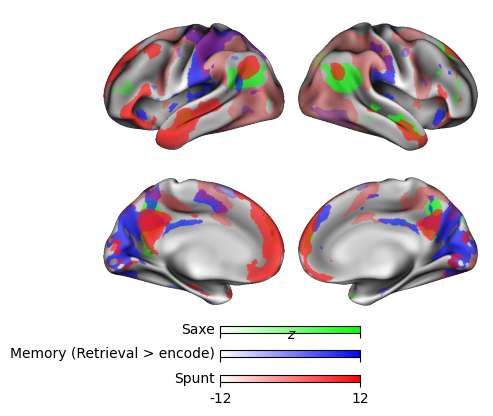

In [669]:
# threshold after projection to avoid interpolation artefacts
memory3_lh = threshold(memory_lh.agg_data(), 3)
memory3_rh = threshold(memory_rh.agg_data(), 3)

saxe3_lh = threshold(saxe_lh.agg_data(), 3)
saxe3_rh = threshold(saxe_rh.agg_data(), 3)

spunt3_lh = threshold(spunt_lh.agg_data(), 3)
spunt3_rh = threshold(spunt_rh.agg_data(), 3)

#   -> get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

color_range = (-12, 12)


p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

#   -> add statistical maps
p.add_layer({'left': saxe3_lh, 'right': saxe3_rh}, cmap=nilearn_cmaps['green_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Saxe')

p.add_layer({'left': memory3_lh, 'right': memory3_rh}, cmap=nilearn_cmaps['blue_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Memory (Retrieval > encode)')

p.add_layer({'left': spunt3_lh, 'right': spunt3_rh}, cmap=nilearn_cmaps['red_transparent_full_alpha_range'],
            color_range=color_range, cbar_label='Spunt')
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)

#   -> build figure
fig = p.build(cbar_kws=cbar_kws)
fig.axes[3].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

## 02.b: plot only positive Z values

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1652854272.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1652854272.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1652854272.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


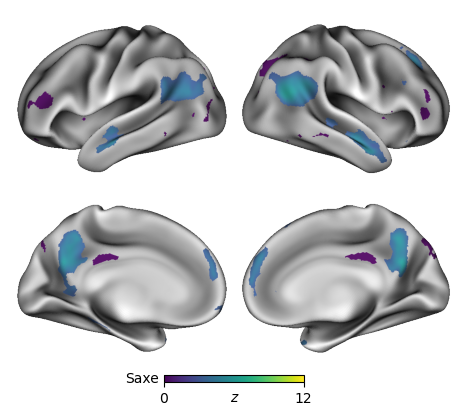

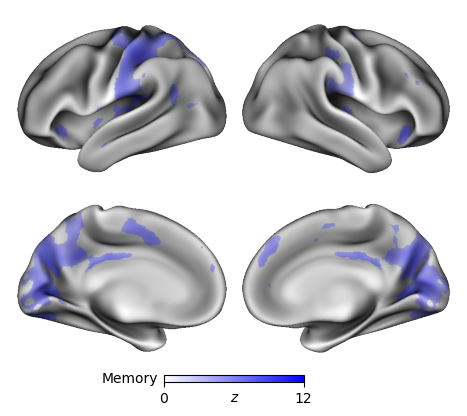

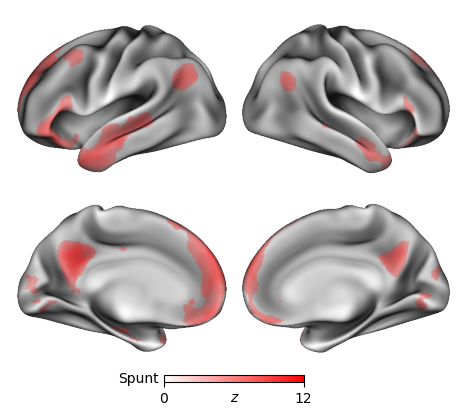

In [675]:
task_surf(saxe3_lh, saxe3_rh, cmap_key=plt.cm.viridis, cmap_range=(0,12), cbar_label='Saxe')
task_surf(memory3_lh, memory3_rh, cmap_key=plt.cm.viridis, cmap_range=(0,12), cbar_label='Memory')
task_surf(spunt3_lh, spunt3_rh, cmap_key=plt.cm.viridis, cmap_range=(0,12), cbar_label='Spunt')

## 02.c: Manipulation check button press (Saxe, Spunt)
* TODO: this isn't really serving as a manipulation check. The buttonpress epoch looks more like theory of mind maps

In [181]:
saxepress = image.load_img(join(second_dir, 'second-level_task-tomsaxe_con-02_desc-rating_stat-betamap.nii.gz'))
spuntpress = image.load_img(join(second_dir, 'second-level_task-tomspunt_con-04_desc-rating_stat-betamap.nii.gz'))


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1547271454.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


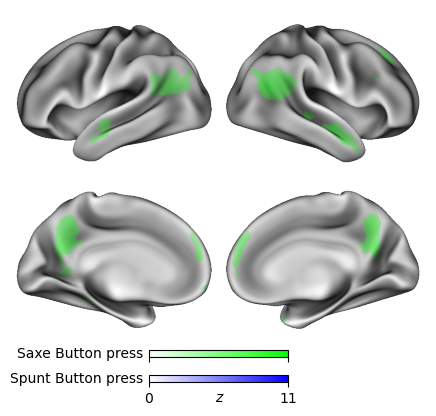

In [182]:
#   -> convert MNI to fsLR and threshold. 
threshold = 3
saxepress_lh, saxepress_rh = mni152_to_fslr(saxepress)
spuntpress_lh, spuntpress_rh = mni152_to_fslr(spuntpress)

saxepress3_lh = threshold(saxepress_lh.agg_data(), threshold)
saxepress3_rh = threshold(saxepress_rh.agg_data(), threshold)

spuntpress3_lh = threshold(spuntpress_lh.agg_data(), threshold)
spuntpress3_rh = threshold(spuntpress_rh.agg_data(), threshold)

#   -> get surfaces + sulc maps and build plot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

color_range = (0, 12)

p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)


p.add_layer({'left': saxepress3_lh, 'right': saxepress3_rh}, cmap=nilearn_cmaps['green_transparent_full_alpha_range'],
            color_range=(0, 11), cbar_label='Saxe Button press')

p.add_layer({'left': spuntpress3_lh, 'right': spuntpress3_rh}, cmap=nilearn_cmaps['blue_transparent_full_alpha_range'],
            color_range=(0, 11), cbar_label='Spunt Button press')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

# 03: Correlation with Margulies Functional Gradient

In [ ]:
from neuromaps.datasets import fetch_annotation
from neuromaps.stats import compare_images
from neuromaps import transforms
import nibabel as nib

In [183]:
fcgradient01 = fetch_annotation(source='margulies2016', desc='fcgradient01', space='fsLR', den='32k')
fcgradient02 = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
fcgradient03 = fetch_annotation(source='margulies2016', desc='fcgradient03', space='fsLR', den='32k')


## 03.a: plot first 3 gradients from Margulies (2016)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


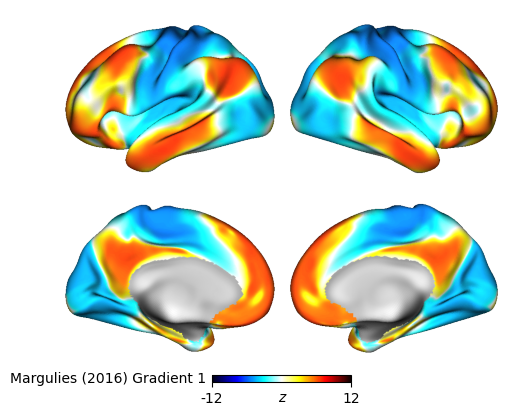

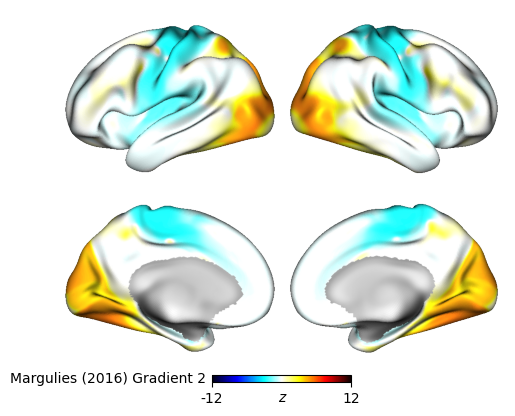

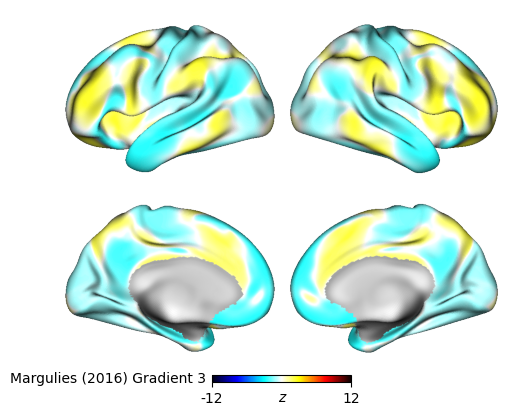

In [184]:
task_surf(fcgradient01[0], fcgradient01[1], cmap_key=plt.cm.viridis, cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 1')
task_surf(fcgradient02[0], fcgradient02[1], cmap_key=plt.cm.viridis, cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 2')
task_surf(fcgradient03[0], fcgradient03[1], cmap_key=plt.cm.viridis, cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 3')

## 03.b: correlation with Margulies Gradient and task

In [185]:
corr01lh = compare_images(fcgradient01[0], memory_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], memory_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], memory_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], memory_rh, metric='pearsonr')
print(f'task-memory lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-memory lh r = -0.328; rh r = -0.019
task-memory lh r = 0.030; rh r = 0.034
task-memory lh r = -0.021; rh r = 0.014


In [186]:
corr01lh = compare_images(fcgradient01[0], saxe_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], saxe_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], saxe_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], saxe_rh, metric='pearsonr')
print(f'task-saxe lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-saxe lh r = 0.402; rh r = 0.488
task-saxe lh r = -0.091; rh r = -0.060
task-saxe lh r = -0.475; rh r = -0.387


In [187]:
corr01lh = compare_images(fcgradient01[0], spunt_lh, metric='pearsonr')
corr01rh = compare_images(fcgradient01[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr01lh:.3f};', f'rh r = {corr01rh:.3f}')

corr02lh = compare_images(fcgradient02[0], spunt_lh, metric='pearsonr')
corr02rh = compare_images(fcgradient02[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr02lh:.3f};', f'rh r = {corr02rh:.3f}')

corr03lh = compare_images(fcgradient03[0], spunt_lh, metric='pearsonr')
corr03rh = compare_images(fcgradient03[1], spunt_rh, metric='pearsonr')
print(f'task-spunt lh r = {corr03lh:.3f};', f'rh r = {corr03rh:.3f}')

task-spunt lh r = 0.596; rh r = 0.437
task-spunt lh r = -0.106; rh r = -0.196
task-spunt lh r = -0.535; rh r = -0.559


# ARCHIVE Calculate gradient within task

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


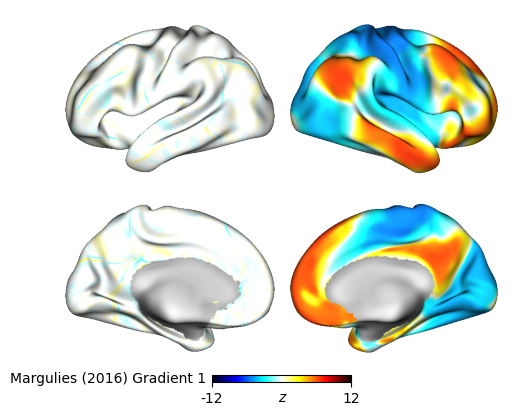

In [228]:
gradient_x = np.gradient(saxe_lh.darrays[0].data, axis=0)
task_surf(gradient_x, fcgradient01[1], cmap_key='cold_white_hot', cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 1')


# ARCHIVE Saxe gradient

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/4232835953.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


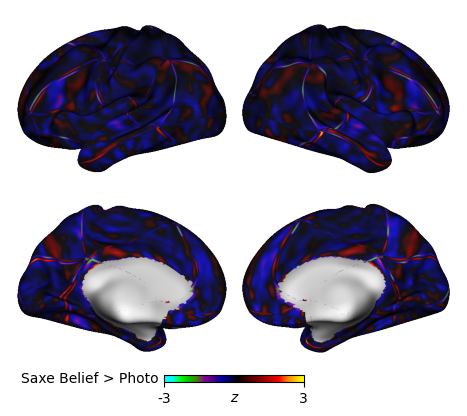

In [250]:
saxe01_lh = threshold(saxe_lh.agg_data(), 0.1)
saxe01_rh = threshold(saxe_rh.agg_data(), 0.1)
# get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

color_range = (-12, 12)
gradient_01lh = np.gradient(saxe_lh.darrays[0].data, axis=0)
gradient_01rh = np.gradient(saxe_rh.darrays[0].data, axis=0)
# gradient_01lh = np.gradient(saxe01_lh, axis=0)
# gradient_01rh = np.gradient(saxe01_rh, axis=0)

p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

# cold_hot is a common diverging colormap for neuroimaging

p.add_layer({'left': gradient_01lh, 'right': gradient_01rh}, cmap=nilearn_cmaps['roy_big_bl'],
            color_range=(-3, 3), cbar_label='Saxe Belief > Photo')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

Context leak detected, msgtracer returned -1
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1395027502.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


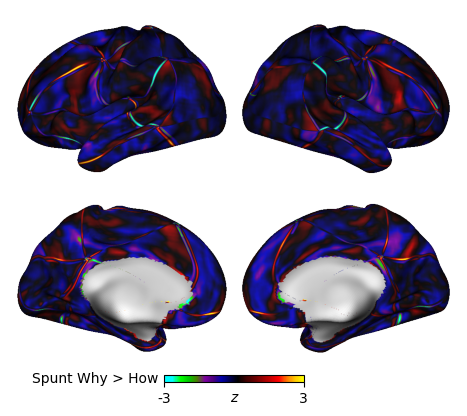

In [249]:
spunt01_lh = threshold(spunt_lh.agg_data(), 0.1)
spunt01_rh = threshold(spunt_rh.agg_data(), 0.1)
#   ->  get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

#   ->  calculate gradient
color_range = (-12, 12)
gradientspunt_01lh = np.gradient(spunt_lh.darrays[0].data, axis=0)
gradientspunt_01rh = np.gradient(spunt_rh.darrays[0].data, axis=0)

#    ->  overlay plot
p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

p.add_layer({'left': gradientspunt_01lh, 'right': gradientspunt_01rh}, cmap=nilearn_cmaps['roy_big_bl'],
            color_range=(-3, 3), cbar_label='Spunt Why > How')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/3458344391.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


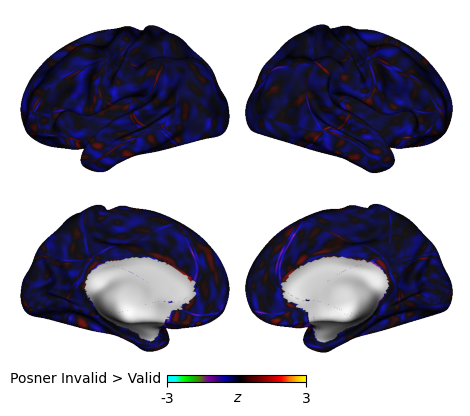

In [248]:
spunt01_lh = threshold(spunt_lh.agg_data(), 0.1)
spunt01_rh = threshold(spunt_rh.agg_data(), 0.1)
#   ->  get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

#   ->  calculate gradient
color_range = (-12, 12)
gradientposner_01lh = np.gradient(posner_lh.darrays[0].data, axis=0)
gradientposner_01rh = np.gradient(posner_rh.darrays[0].data, axis=0)

#    ->  overlay plot
p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

p.add_layer({'left': gradientposner_01lh, 'right': gradientposner_01rh}, cmap=nilearn_cmaps['roy_big_bl'],
            color_range=(-3, 3), cbar_label='Posner Invalid > Valid')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

In [ ]:
# Memory gradient

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/426349818.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


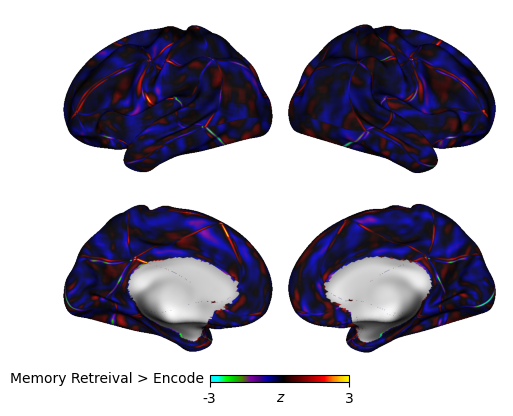

In [247]:
spunt01_lh = threshold(spunt_lh.agg_data(), 0.1)
spunt01_rh = threshold(spunt_rh.agg_data(), 0.1)
#   ->  get surfaces + sulc maps
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

#   ->  calculate gradient
color_range = (-12, 12)
gradientmemory_01lh = np.gradient(memory_lh.darrays[0].data, axis=0)
gradientmemory_01rh = np.gradient(memory_rh.darrays[0].data, axis=0)

#    ->  overlay plot
p = Plot(lh, rh)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

p.add_layer({'left': gradientmemory_01lh, 'right': gradientmemory_01rh}, cmap=nilearn_cmaps['roy_big_bl'],
            color_range=(-3, 3), cbar_label='Memory Retreival > Encode')

cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar
fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()

# 04: Mesh gradient
* need to figure out mesh gradient
* need a 2d or 3d space
* from that, calculate gradeint

In [558]:
from neuromaps.transforms import mni152_to_fslr, mni152_to_fsaverage, mni152_to_civet
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
from neuromaps.datasets import fetch_atlas, fetch_fslr, fetch_fsaverage
from surfplot import Plot
from surfplot.utils import threshold

memorylh, memoryrh = mni152_to_fslr(retreivalGTencode) #, fslr_density='32k', method='linear')
posnerlh, posnerrh = mni152_to_fslr(posnernii)
saxelh, saxerh     = mni152_to_fslr(saxenii)
spuntlh, spuntrh   = mni152_to_fslr(spuntnii)

In [609]:
fslr = fetch_atlas('fsLR', '32k')
fslr_left_infl = nib.load(fslr['inflated'].L)
fslr_left_infl.add_gifti_data_array(memorylh.darrays[0])
nib.save(fslr_left_infl, '/Users/h/Desktop/TESTmemoryL.surf.gii')

# fslr = fetch_atlas('fsLR', '32k')
fslr_right_infl = nib.load(fslr['inflated'].R)
fslr_right_infl.add_gifti_data_array(memoryrh.darrays[0])
nib.save(fslr_right_infl, '/Users/h/Desktop/TESTmemoryR.surf.gii')

In [561]:
TESTl = nib.load('/Users/h/Desktop/TESTmemoryL.surf.gii')
TESTr = nib.load('/Users/h/Desktop/TESTmemoryR.surf.gii')

In [462]:
memorylh.darrays[0].data

array([ 3.045206 ,  1.4812734, -4.2657566, ..., -1.8824955, -1.6700177,
       -1.9276835], dtype=float32)

In [522]:
TESTl.darrays[2].data

array([ 3.045206 ,  1.4812734, -4.2657566, ..., -1.8824955, -1.6700177,
       -1.9276835], dtype=float32)

In [716]:
v, t, d = TESTl.darrays

In [722]:
fslr['medial'][0]

PosixPath('/Users/h/neuromaps-data/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_desc-nomedialwall_dparc.label.gii')

In [714]:
v.data

array([[ 35.004333, -32.86439 ,  16.894304],
       [ 15.553893, -28.189137,  72.46244 ],
       [-30.412945,  23.256935,  37.84298 ],
       ...,
       [-42.716404, -29.93988 , -34.82095 ],
       [-43.041786, -29.880045, -33.61637 ],
       [-42.66028 , -31.561842, -33.98441 ]], dtype=float32)

In [640]:
vertices_load = TESTl.darrays[0].data
triangles_load = TESTl.darrays[1].data
data_load = TESTl.darrays[2].data
print(f"face {vertices_load.shape}\n {vertices_load}")
print(f"\triangles: {triangles_load.shape}\n {triangles_load}")
# triangles = faces

face (32492, 3)
 [[ 35.004333 -32.86439   16.894304]
 [ 15.553893 -28.189137  72.46244 ]
 [-30.412945  23.256935  37.84298 ]
 ...
 [-42.716404 -29.93988  -34.82095 ]
 [-43.041786 -29.880045 -33.61637 ]
 [-42.66028  -31.561842 -33.98441 ]]
	riangles: (64980, 3)
 [[   68    12     0]
 [  180    12    68]
 [  180    13    12]
 ...
 [ 8440 32491 21432]
 [ 8440  8441 32491]
 [    9  8440 21432]]


In [707]:
nib.load(fslr['medial'])

TypeError: stat: path should be string, bytes, os.PathLike or integer, not Surface

In [657]:
fslr_Lmedial_infl = nib.load(fslr['medial'].L)
medial_index_L = np.where(fslr_Lmedial_infl.darrays[0].data ==0)[0]
fslr_Rmedial_infl = nib.load(fslr['medial'].R)
medial_index_R = np.where(fslr_Rmedial_infl.darrays[0].data ==0)[0]


vertices = np.copy(vertices_load)
# triangles = np.copy(triangles_load)
vertices[medial_index_L] = np.nan
data = np.copy(data_load)
data[medial_index_L] = np.nan
triangles = triangles_load
# triangles[medial_index_L] = np.nan
# new_vertices = vertices[non_medial_wall_vertices]
# new_triangles = triangles[non_medial_wall_vertices]
# new_data = data[non_medial_wall_vertices]


In [654]:
medial_index_L.shape

(2796,)

In [655]:
vertices

array([[ 35.004333, -32.86439 ,  16.894304],
       [ 15.553893, -28.189137,  72.46244 ],
       [-30.412945,  23.256935,  37.84298 ],
       ...,
       [-42.716404, -29.93988 , -34.82095 ],
       [-43.041786, -29.880045, -33.61637 ],
       [-42.66028 , -31.561842, -33.98441 ]], dtype=float32)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/449593232.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


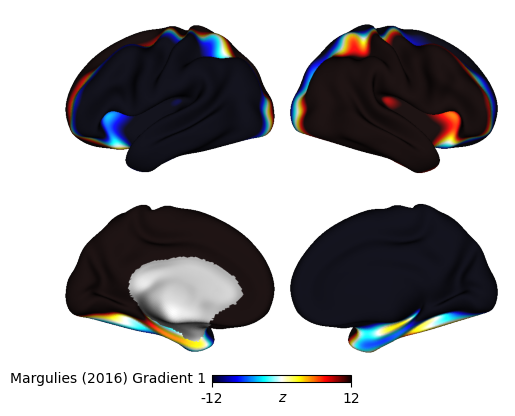

In [656]:
task_surf(vertices, TESTr.darrays[0].data, cmap_key='cold_white_hot', cmap_range=(-12,12), cbar_label='Margulies (2016) Gradient 1')


In [658]:
import numpy as np


# The gradient_field represents the gradient vectors associated with each vertex in a 3D mesh. In the context of your previous questions and code snippets, it appears to be a NumPy array used to store gradient information computed based on some data associated with the vertices of the mesh.

# Here's a breakdown of its components:

# Vertices: These are the points in 3D space that define the shape of the mesh. Each vertex has a position represented as a coordinate (x, y, z).

# Triangles: These are typically the faces of the mesh, defined by sets of three vertices. Triangles are used to represent the surface of the 3D object.

# Data: This is associated with each vertex and represents some information related to that vertex. It could be any kind of data, such as scalar values (e.g., vertex colors, intensities), vector values (e.g., normals), or other attributes. The specific type of data would depend on the application.

# Gradient Field: The gradient field represents the estimated gradient vectors at each vertex based on the associated data. In many applications, gradient vectors describe how the associated data varies across the surface of the mesh. For example, if the data represents scalar values (e.g., temperatures on a 3D surface), the gradient vectors can represent how the temperature changes from one vertex to another, indicating the direction and magnitude of the steepest increase or decrease in temperature.

# The code you provided calculates the gradient field by computing weighted sums of neighboring vertex normals (calculated from the triangle normals) and associates them with the vertices based on the associated data. This can be useful for various purposes, including surface visualization, data analysis, and simulations, depending on the context of your application.


# Assuming you have loaded your vertices, triangles, and data as described earlier
# 'vertices' is a (V, 3) array of vertex coordinates
# 'triangles' is a (T, 3) array of triangle indices
# 'data' is a (V, D) array of data associated with each vertex, where D is the dimensionality of the data (e.g., 1 for scalar data, 3 for vector data)

# Initialize an empty array to store the gradient vectors at each vertex
# gradient_field = np.zeros((vertices.shape[0], data.shape[0]))  # Initialize as zeros for each vertex and each data dimension
gradient_field = np.zeros(vertices.shape[0])
# Calculate vertex normals (similar to step 2 in a previous response)
vertex_normals = np.zeros_like(vertices)

for triangle in triangles:
    v1 = vertices[triangle[0]]
    v2 = vertices[triangle[1]]
    v3 = vertices[triangle[2]]
    triangle_normal = np.cross(v2 - v1, v3 - v1)

    # Add the triangle normal to the vertex normals of its vertices
    vertex_normals[triangle] += triangle_normal

# Normalize the vertex normals
vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:, np.newaxis]

# Calculate the gradient field at each vertex based on the associated data
# for vertex_idx, vertex in enumerate(vertices):
#     # Calculate the gradient as the weighted sum of neighboring vertex normals, weighted by the associated data
#     neighbors = np.where(triangles == vertex_idx)[0]
#     weighted_normals = vertex_normals[triangles[neighbors]] * data[triangles[neighbors]][:, np.newaxis, :]
#     gradient = np.sum(weighted_normals, axis=0)
#     print(gradient.shape)
#     # Store the gradient in the gradient field
#     gradient_field[vertex_idx] = gradient

# Calculate the gradient field at each vertex based on the associated data
for vertex_idx, vertex in enumerate(vertices):
    # Calculate the gradient as the weighted sum of neighboring vertex normals, weighted by the associated data
    neighbors = np.where(triangles == vertex_idx)[0]
    weighted_normals = vertex_normals[triangles[neighbors]] * data[triangles[neighbors]][:, np.newaxis]
    gradient = np.sum(weighted_normals)
    
    # Store the gradient in the gradient field
    gradient_field[vertex_idx] = gradient

# 'gradient_field' now contains the estimated gradient values (scalar) at each vertex based on the associated data

# 'gradient_field' now contains the estimated gradient vectors at each vertex based on the associated data


In [659]:
gradient_field.shape

(32492,)

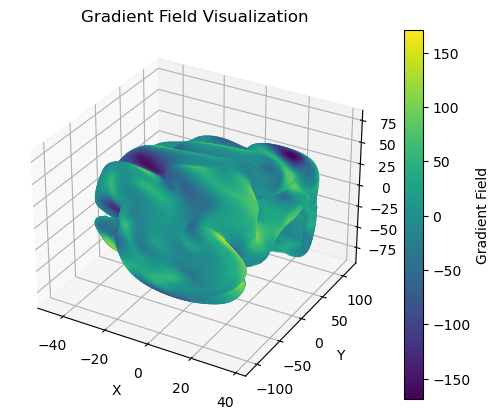

In [660]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'vertices' and 'gradient_field' with the correct shapes

# Create a 3D scatter plot of the vertices with colors based on the gradient_field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c=gradient_field, cmap='viridis')

# Add a colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Gradient Field')

# Customize the plot further if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gradient Field Visualization')

# Show the plot
plt.show()


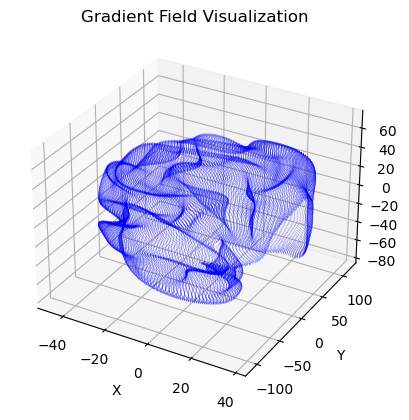

In [682]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'vertices' and 'gradient_field' with the correct shapes

# Create a 3D scatter plot of the vertices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot arrows for the gradient field
for vertex, gradient_scalar in zip(vertices, gradient_field):
    gradient = gradient_scalar * np.array([1, 1, 1])  # Create a 3D vector from the scalar value
    ax.quiver(vertex[0], vertex[1], vertex[2], gradient[0], gradient[1], gradient[2], length=0.1, normalize=True, color='b')

# Customize the plot further if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gradient Field Visualization')

# Show the plot
plt.show()


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1334459324.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Gradient Magnitude')


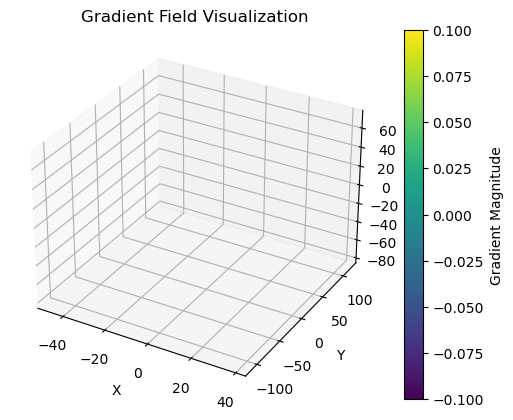

In [688]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'vertices' and 'gradient_field' with the correct shapes

# Create a 3D scatter plot of the vertices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot arrows for the gradient field
for vertex, gradient_scalar in zip(vertices, gradient_field):
    gradient = gradient_scalar * np.array([1, 1, 1])  # Create a 3D vector from the scalar value
    norm_gradient_magnitude = norm(np.linalg.norm(gradient_field))
    color = plt.cm.viridis(norm_gradient_magnitude)
    ax.quiver(vertex[0], vertex[1], vertex[2], gradient[0], gradient[1], gradient[2], 
              length=0.1, normalize=True, color=color)

# Customize the plot further if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gradient Field Visualization')

# Create a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Gradient Magnitude')

# Show the plot
plt.show()


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_27830/1572038033.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Gradient Magnitude')


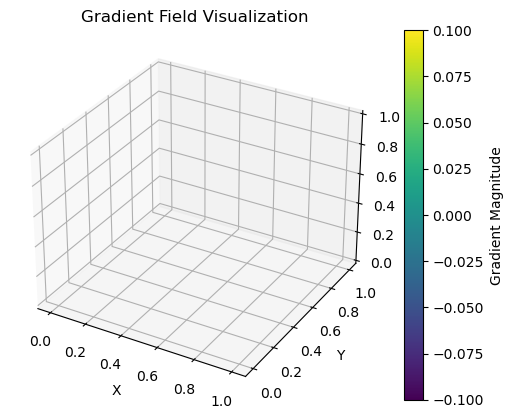

In [690]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 'vertices' and 'gradient_field' with the correct shapes

# Create a 3D scatter plot of the vertices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the maximum magnitude in the entire gradient field for normalization
max_magnitude = np.max(np.linalg.norm(gradient_field))

# Plot arrows for the gradient field
for vertex, gradient in zip(vertices, gradient_field):
    # Create a 3D vector from the scalar value
    gradient = gradient * np.array([1, 1, 1])
    
    # Calculate the magnitude of the gradient vector
    magnitude = np.linalg.norm(gradient)
    
    # Normalize the gradient vector
    normalized_gradient = gradient / magnitude if magnitude > 0 else gradient
    
    # Scale the length of the arrow for visualization
    scaled_gradient = normalized_gradient * (magnitude / max_magnitude) * 0.1
    
    # Color the quiver based on the magnitude
    color = plt.cm.viridis(magnitude / max_magnitude)
    
    ax.quiver(vertex[0], vertex[1], vertex[2], scaled_gradient[0], scaled_gradient[1], scaled_gradient[2], 
              length=0.1, normalize=False, color=color)

# Customize the plot further if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gradient Field Visualization')

# Create a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_magnitude))
sm.set_array([])
plt.colorbar(sm, label='Gradient Magnitude')

# Show the plot
plt.show()


# vertex

In [ ]:
import numpy as np

# Assuming 'vertices' is your (V, 3) array of vertex coordinates
V = vertices.shape[0]
similarity_matrix = np.zeros((V, V))

# Compute pairwise Euclidean distances
for i in range(V):
    for j in range(i + 1, V):
        distance = np.linalg.norm(vertices[i] - vertices[j])
        # You can use other similarity functions here, e.g., exponential kernel
        similarity_matrix[i, j] = similarity_matrix[j, i] = distance

# Normalize the similarity matrix if needed (optional)
# You can apply kernel functions or other transformations to emphasize certain relationships


In [2]:
def surf_data_save(mni_img_obj, output_dir, output_fname):
    from neuromaps.transforms import mni152_to_fslr
    from neuromaps.datasets import fetch_atlas
    fslrlh, fslrrh = mni152_to_fslr(mni_img_obj)
    fslr = fetch_atlas('fsLR', '32k')
    fslr_left_infl = nib.load(fslr['inflated'].L)
    fslr_left_infl.add_gifti_data_array(fslrlh.darrays[0])
    nib.save(fslr_left_infl, join(output_dir, f'{output_fname}L.surf.gii'))


    fslr_right_infl = nib.load(fslr['inflated'].R)
    fslr_right_infl.add_gifti_data_array(fslrrh.darrays[0])
    nib.save(fslr_right_infl, join(output_dir, f'{output_fname}R.surf.gii'))

In [3]:
def load_and_rm_medial(surf_gii_fname, surf_gii_folder, hemi):
    from neuromaps.datasets import fetch_atlas, fetch_fslr
    fslr = fetch_atlas('fsLR', '32k')
    TESTl = nib.load(join(surf_gii_folder, f'{surf_gii_fname}{hemi}.surf.gii'))
    print(join(surf_gii_folder, f'{surf_gii_fname}{hemi}.surf.gii'))
    if hemi == 'L':
        fslr_medial_infl = nib.load(fslr['medial'][0])
    elif hemi == 'R':
        fslr_medial_infl = nib.load(fslr['medial'][1])
    medial_index = np.where(fslr_medial_infl.darrays[0].data ==0)[0]

    vertices_load = TESTl.darrays[0].data
    triangles_load = TESTl.darrays[1].data
    data_load = TESTl.darrays[2].data

    vertices = np.copy(vertices_load)
    vertices[medial_index] = np.nan
    data = np.copy(data_load)
    data[medial_index] = np.nan
    triangles = triangles_load
    return vertices, triangles, data

def calc_normal_vector(vertices, triangles):
    vertex_normals = np.zeros_like(vertices)
    for triangle in triangles:
        v1 = vertices[triangle[0]]
        v2 = vertices[triangle[1]]
        v3 = vertices[triangle[2]]
        triangle_normal = np.cross(v2 - v1, v3 - v1)
        # Add the triangle normal to the vertex normals of its vertices
        vertex_normals[triangle] += triangle_normal
    # Normalize the vertex normals
    vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:, np.newaxis]
    return vertex_normals

def calc_gradient(vertex_normals, triangles, vertices, data):
    gradient_field = np.zeros(vertices.shape[0])
    # Calculate the gradient field at each vertex based on the associated data
    for vertex_idx, vertex in enumerate(vertices):
        # Calculate the gradient as the weighted sum of neighboring vertex normals, weighted by the associated data
        neighbors = np.where(triangles == vertex_idx)[0]
        weighted_normals = vertex_normals[triangles[neighbors]] * data[triangles[neighbors]][:, np.newaxis]
        gradient = np.sum(weighted_normals)
        
        # Store the gradient in the gradient field
        gradient_field[vertex_idx] = gradient
    return gradient_field

def gii_calc_gradient(surf_gii_fname, surf_gii_folder, hemi):
    vertices, triangles, data = load_and_rm_medial(surf_gii_fname=surf_gii_fname, surf_gii_folder=surf_gii_folder, hemi=hemi)
    vertex_normals = calc_normal_vector(vertices, triangles)
    gradient_field = calc_gradient(vertex_normals, triangles, vertices, data)
    return gradient_field

In [87]:
def write_gifti(gradient_array, hemi, save_name, output_dir):
    from neuromaps.datasets import fetch_atlas, fetch_fslr   
    fslr = fetch_atlas('fsLR', '32k')
    if hemi == 'L':
        fslr_infl = nib.load(fslr['inflated'][0])
    elif hemi == 'R':
        fslr_infl = nib.load(fslr['inflated'][1])
    fslr_infl.add_gifti_data_array(nib.gifti.GiftiDataArray(gradient_array.astype(np.float32)))
    nib.save(fslr_infl, join(output_dir, f'{save_name}{hemi}.surf.gii'))

In [704]:
surf_data_save(retreivalGTencode, 
               output_dir='/Users/h/Documents/projects_local/sandbox/gradient',
               output_fname='retreivalGTencode')
surf_data_save(spuntnii, 
               output_dir='/Users/h/Documents/projects_local/sandbox/gradient',
               output_fname='spunt')
surf_data_save(saxenii, 
               output_dir='/Users/h/Documents/projects_local/sandbox/gradient',
               output_fname='saxe')
surf_data_save(posnernii, 
               output_dir='/Users/h/Documents/projects_local/sandbox/gradient',
               output_fname='posner')

In [79]:
output_dir='/Users/h/Documents/projects_local/sandbox/gradient'
gradient_saxeL = gii_calc_gradient('saxe', output_dir, hemi='L')
gradient_saxeR = gii_calc_gradient('saxe', output_dir, hemi='R')

write_gifti(gradient_saxeL, hemi="L", output_dir=output_dir, save_name="gradient_saxe")
write_gifti(gradient_saxeR, hemi="R", output_dir=output_dir, save_name="gradient_saxe")

/Users/h/Documents/projects_local/sandbox/gradient/saxeL.surf.gii
/Users/h/Documents/projects_local/sandbox/gradient/saxeR.surf.gii


In [7]:
gradient_spuntL = gii_calc_gradient('spunt', output_dir, hemi='L')
gradient_spuntR = gii_calc_gradient('spunt', output_dir, hemi='R')

write_gifti(gradient_spuntL, hemi="L", output_dir=output_dir, save_name="gradient_spunt")
write_gifti(gradient_spuntR, hemi="R", output_dir=output_dir, save_name="gradient_spunt")

/Users/h/Documents/projects_local/sandbox/gradient/spuntL.surf.gii
/Users/h/Documents/projects_local/sandbox/gradient/spuntR.surf.gii


In [8]:
gradient_memL = gii_calc_gradient('retreivalGTencode', output_dir, hemi='L')
gradient_memR = gii_calc_gradient('retreivalGTencode', output_dir, hemi='R')
write_gifti(gradient_memL, hemi="L", output_dir=output_dir, save_name="gradient_mem")
write_gifti(gradient_memR, hemi="R", output_dir=output_dir, save_name="gradient_mem")

/Users/h/Documents/projects_local/sandbox/gradient/retreivalGTencodeL.surf.gii
/Users/h/Documents/projects_local/sandbox/gradient/retreivalGTencodeR.surf.gii


In [9]:
print(np.nanmin(gradient_spuntL), np.nanmax(gradient_spuntL))

-211.8441925048828 246.3002166748047


In [38]:
gradient_saxeL

array([51.53227234,  4.02351761,  5.66208553, ..., 17.85616684,
        8.60365963, 21.40655136])

In [39]:
gradient_saxeR

array([-21.06845474, -33.78885651,   1.31263721, ..., -27.76722336,
       -21.2158699 , -27.41049576])

In [53]:
print(np.nanmin(gradient_memL), np.nanmax(gradient_memL))

-169.1515350341797 171.12295532226562


/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


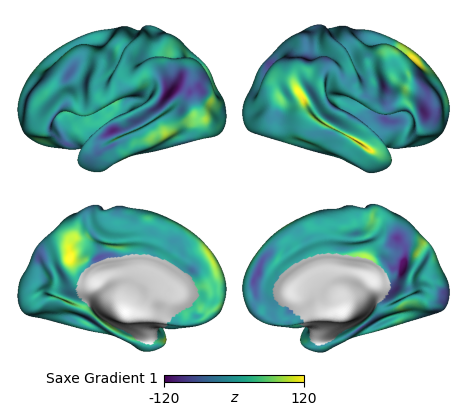

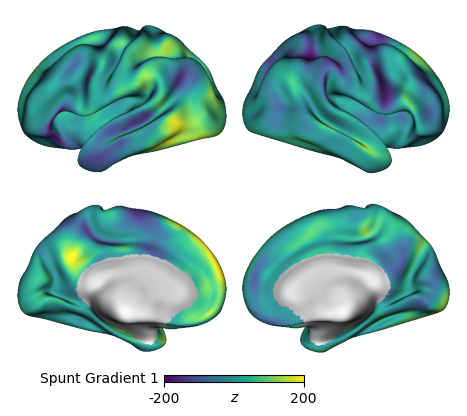

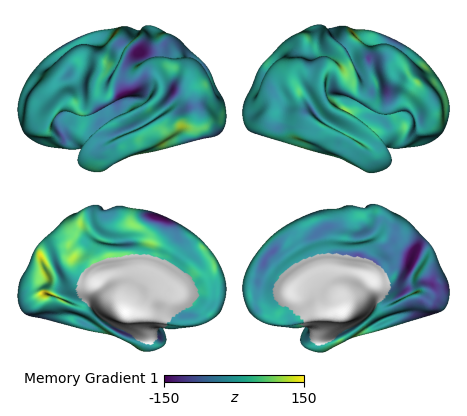

In [89]:
from surfplot import Plot
task_surf(gradient_saxeL,gradient_saxeR, cmap_key=plt.cm.viridis, cmap_range=(-120,120), cbar_label='Saxe Gradient 1')
task_surf(gradient_spuntL,gradient_spuntR, cmap_key=plt.cm.viridis, cmap_range=(-200,200), cbar_label='Spunt Gradient 1')
task_surf(gradient_memL,gradient_memR, cmap_key=plt.cm.viridis, cmap_range=(-150,150), cbar_label='Memory Gradient 1')

## 04.b compare with univariate map

In [14]:
saxeL = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/saxeL.surf.gii')
saxeR = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/saxeR.surf.gii')
spuntL = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/spuntL.surf.gii')
spuntR = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/spuntR.surf.gii')
memL = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/retreivalGTencodeL.surf.gii')
memR = nib.load('/Users/h/Documents/projects_local/sandbox/gradient/retreivalGTencodeR.surf.gii')

In [84]:
def task_surf(task_lh, task_rh, cmap_key, cmap_range, cbar_label):
    from neuromaps.datasets import fetch_fslr
    from surfplot import Plot
    # get surfaces + sulc maps
    surfaces = fetch_fslr()
    lh, rh = surfaces['inflated']
    sulc_lh, sulc_rh = surfaces['sulc']

    p = Plot(lh, rh)
    p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)

    p.add_layer({'left': task_lh, 'right': task_rh}, cmap=cmap_key,
                color_range=cmap_range, cbar_label=cbar_label)

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
    fig = p.build(cbar_kws=cbar_kws)
    # add units to colorbar
    fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
    fig.show()

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_19403/3341339913.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


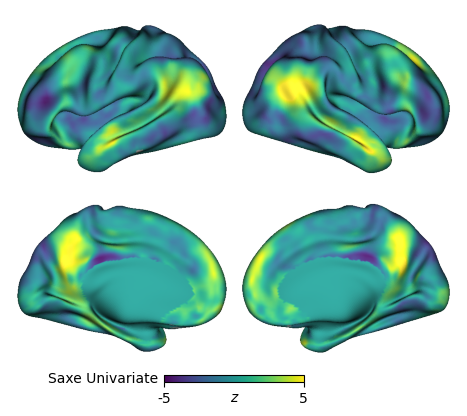

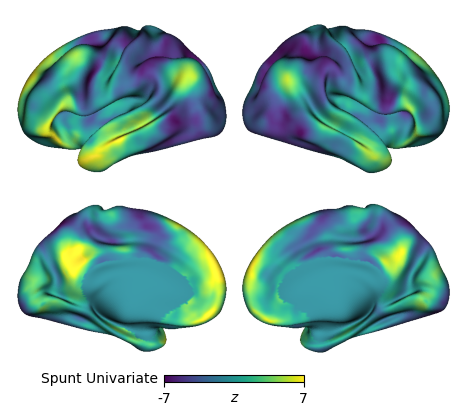

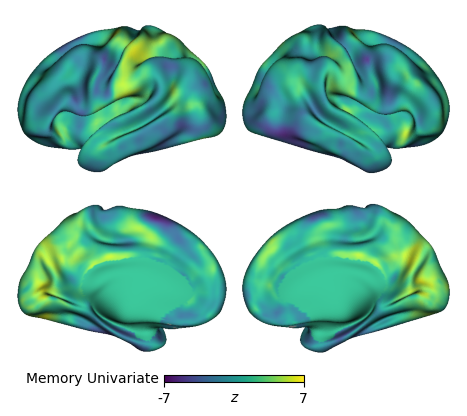

In [85]:
from surfplot import Plot
task_surf(saxeL.darrays[2].data,saxeR.darrays[2].data, cmap_key=plt.cm.viridis, cmap_range=(-5, 5), cbar_label='Saxe Univariate')
task_surf(spuntL.darrays[2].data, spuntR.darrays[2].data,cmap_key=plt.cm.viridis, cmap_range=(-7,7), cbar_label='Spunt Univariate')
task_surf(memL.darrays[2].data,memR.darrays[2].data, cmap_key=plt.cm.viridis, cmap_range=(-7,7), cbar_label='Memory Univariate')